In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [2]:
metric_file_name = 'metric_rt_threshold2000_3000.log'

In [3]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [4]:
df.head()

,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,10:22:0,12382.0246,8522.652241,1,2.9,94.4,4.0,96.0,94.2,4.2,...,229026.4,1211381.2,0.0,1176410.0,100.0,13.3,13.3,13.6,13.3,13.8
1,10:22:1,12416.0940,12416.094000,1,0.1,94.4,3.3,96.7,95.0,3.4,...,230651.2,1215824.4,0.0,1176458.8,100.0,18.5,18.5,19.2,17.9,19.2
2,10:22:2,13699.3660,9620.807706,1,1.7,95.6,3.5,96.5,94.3,4.4,...,224680.0,1209888.8,0.0,1176816.4,100.0,13.2,13.2,14.3,12.7,14.1
3,10:22:3,11656.0590,11656.059000,1,0.1,95.3,3.1,96.9,94.4,4.1,...,224964.8,1211289.2,0.0,1176825.6,100.0,17.8,17.8,19.0,17.3,19.2
4,10:22:4,6808.8997,1786.151833,2,1.2,83.9,14.0,86.0,82.9,14.7,...,227040.0,1194140.8,0.0,1067758.0,100.0,13.5,13.5,13.2,12.9,12.8


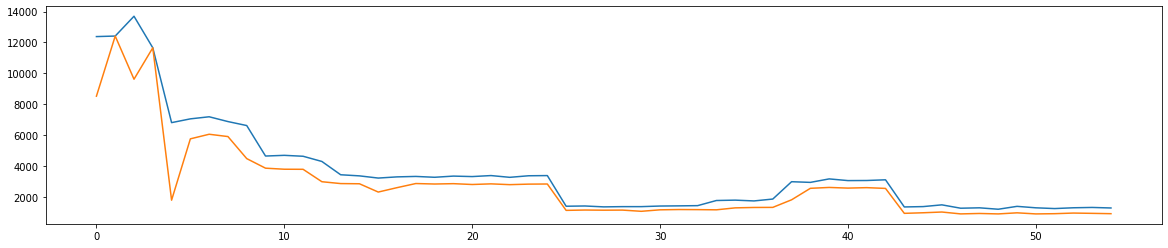

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df[' response_time_p95'])
plt.plot(df[' response_time'])
plt.show()

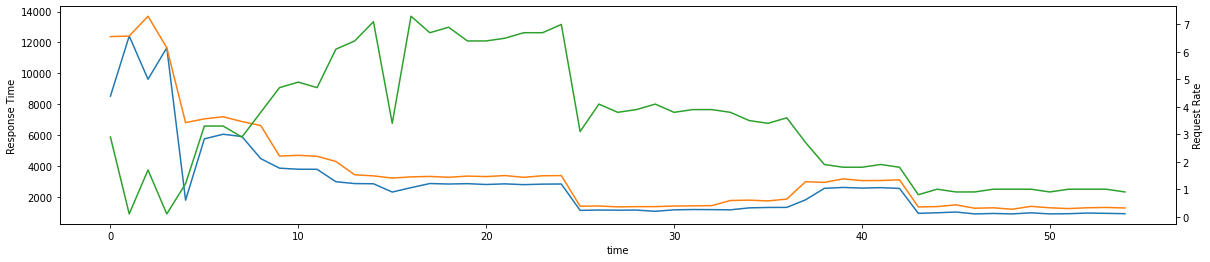

In [6]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df[' response_time'], color = 'C0')
ax1.plot(df[' response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df[' request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

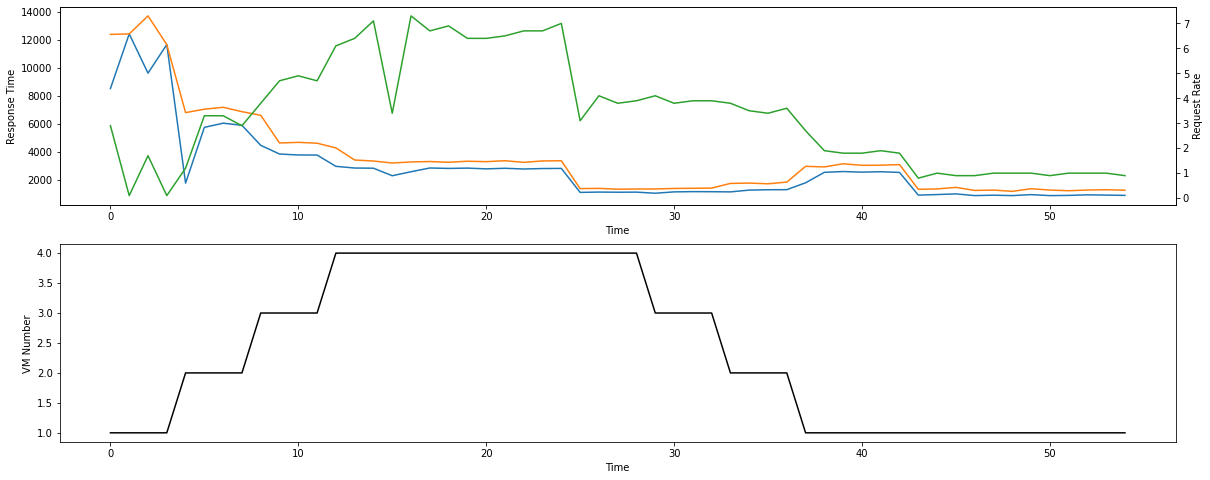

In [7]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df[' response_time'], color = 'C0')
ax1.plot(df[' response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df[' request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df[' worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [8]:
df.iloc[:, 0:5].describe()

,response_time_p95,response_time,worker_number,request_rate
count,55.000000,55.000000,55.000000,55.000000
mean,3550.705954,2800.094399,2.363636,3.370909
std,3036.853719,2584.908254,1.296200,2.166895
min,1199.233900,896.280500,1.000000,0.100000
25%,1390.166400,1131.492847,1.000000,1.100000
50%,3060.855200,2548.009000,2.000000,3.400000
75%,3406.257125,2858.387766,4.000000,4.700000
max,13699.366000,12416.094000,4.000000,7.300000


In [9]:
df.columns

Index(['time', ' response_time_p95', ' response_time', ' worker_number',
       ' request_rate', 'CPU0User%', ' CPU0Idle%', ' CPU0Total%', ' CPU1User%',
       ' CPU1Idle%', ' CPU1Total%', '[DSK:sda]Reads', ' [DSK:sda]RMerge',
       ' [DSK:sda]RKBytes', ' [DSK:sda]WaitR', ' [DSK:sda]Writes',
       ' [DSK:sda]WMerge', ' [DSK:sda]WKBytes', ' [DSK:sda]WaitW',
       ' [DSK:sda]Request', ' [DSK:sda]QueLen', ' [DSK:sda]Wait',
       ' [DSK:sda]SvcTim', ' [DSK:sda]Util', '[NUMA:0]Used', ' [NUMA:0]Free',
       ' [NUMA:0]Slab', ' [NUMA:0]Mapped', ' [NUMA:0]Anon', ' [NUMA:0]AnonH',
       ' [NUMA:0]Inactive', ' [NUMA:0]Hits', '[TCPD]InReceives',
       ' [TCPD]InDelivers', ' [TCPD]OutRequests', ' [TCPD]InSegs',
       ' [TCPD]OutSegs'],
      dtype='object')

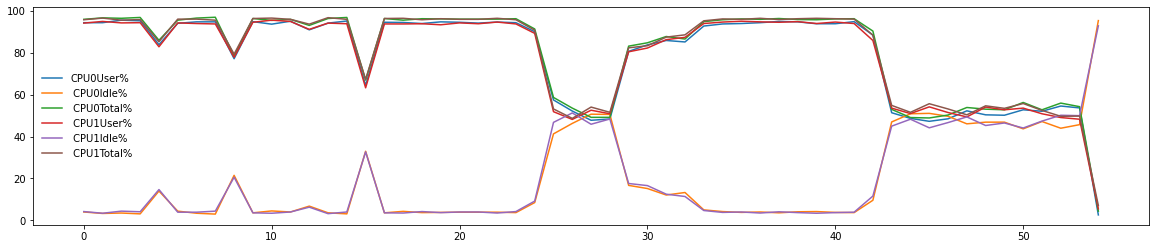

In [10]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'CPU' in col_name:
    plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [11]:
df.iloc[:, 5:11].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,78.929091,19.361818,80.609091,78.914545,19.410909,80.567273
std,21.606563,21.623739,21.648362,21.237069,21.436207,21.461749
min,2.600000,3.000000,4.400000,5.500000,3.200000,7.100000
25%,54.150000,3.800000,56.150000,53.850000,3.900000,55.300000
50%,93.700000,4.500000,95.500000,93.800000,4.400000,95.600000
75%,94.550000,43.850000,96.200000,94.300000,44.600000,96.100000
max,95.600000,95.400000,97.000000,95.600000,92.900000,96.800000


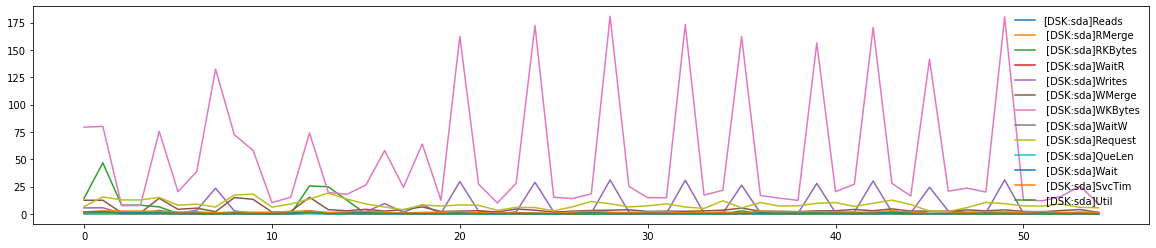

In [12]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'DSK' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [13]:
df.iloc[:, 11:24].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.105455,0.054545,2.716364,0.089091,6.576364,4.174545,52.289091,0.878182,8.714545,0.094545,0.929091,1.678182,0.445455
std,0.387498,0.404520,8.143022,0.221671,10.585682,3.575597,56.520254,0.332048,3.779399,0.075567,0.375979,0.610006,0.373580
min,0.000000,0.000000,0.000000,0.000000,0.300000,1.000000,7.600000,0.100000,2.300000,0.000000,0.100000,0.300000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.600000,2.400000,15.200000,0.800000,6.300000,0.000000,0.800000,1.300000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,1.600000,2.900000,23.600000,0.900000,7.900000,0.100000,0.900000,1.700000,0.400000
75%,0.000000,0.000000,0.000000,0.000000,4.450000,4.050000,73.200000,1.050000,10.400000,0.150000,1.100000,2.050000,0.500000
max,2.100000,3.000000,46.700000,1.200000,31.100000,15.200000,180.800000,1.700000,19.100000,0.200000,1.800000,2.900000,2.200000


In [14]:
df.iloc[:, 24:32].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,55.0,5.500000e+01,55.0
mean,3.590772e+06,439761.970909,202415.018182,227424.763636,1.213644e+06,0.0,1.154439e+06,100.0
std,3.374807e+04,33749.922980,10302.498476,1814.778385,6.308355e+03,0.0,3.352011e+04,0.0
min,3.487921e+06,392742.800000,166116.800000,221674.000000,1.192007e+06,0.0,1.067758e+06,100.0
25%,3.598701e+06,428571.200000,204411.600000,227201.000000,1.214523e+06,0.0,1.152222e+06,100.0
50%,3.600045e+06,430486.800000,205291.200000,227640.400000,1.215609e+06,0.0,1.152686e+06,100.0
75%,3.601961e+06,431831.200000,206158.800000,227958.400000,1.216502e+06,0.0,1.153087e+06,100.0
max,3.637797e+06,542619.200000,207240.000000,232859.200000,1.220844e+06,0.0,1.238934e+06,100.0


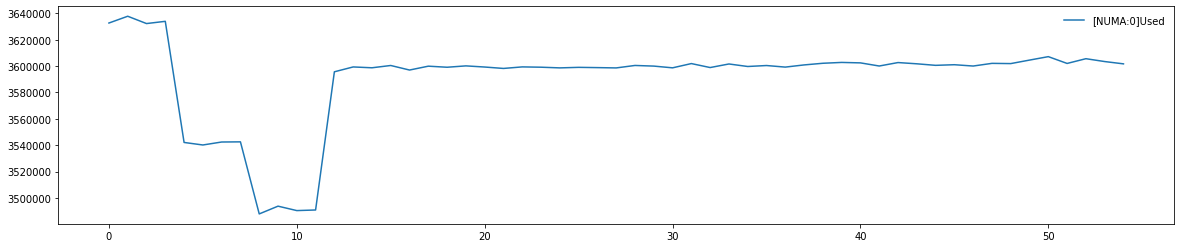

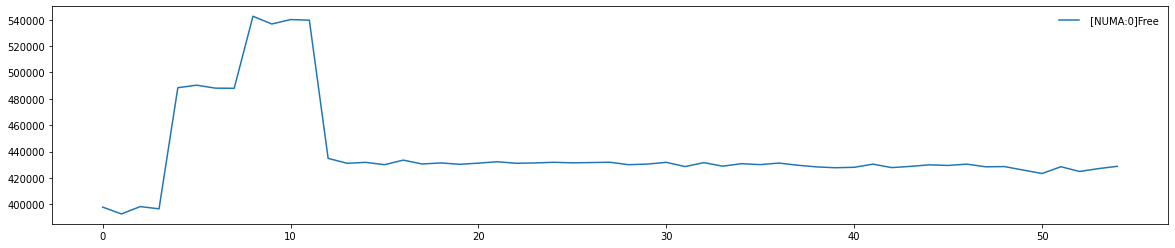

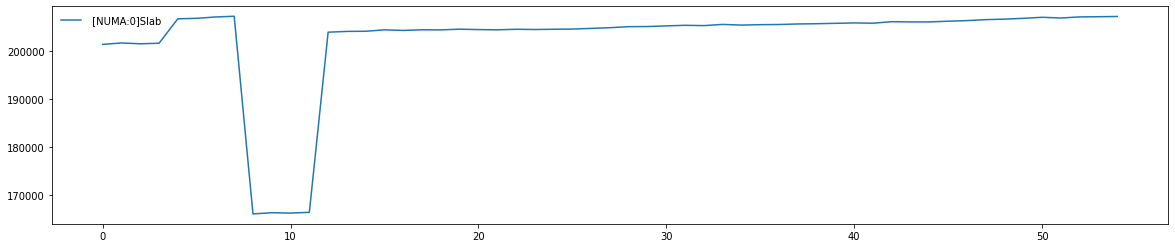

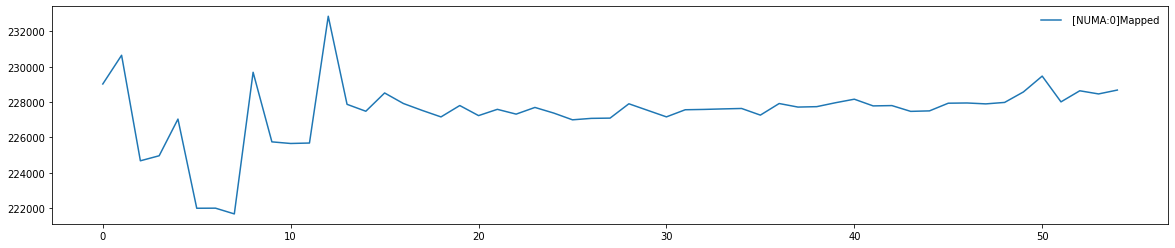

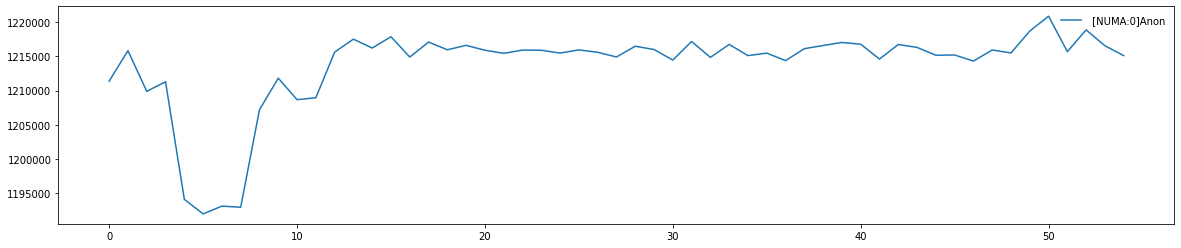

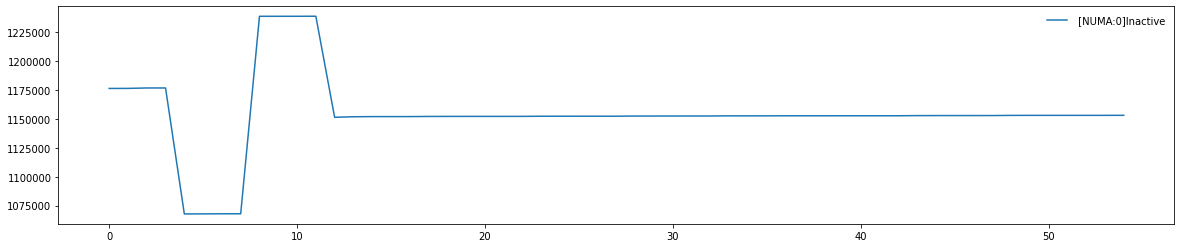

In [15]:
for col_name in df.columns:
  if 'NUMA' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.figure(figsize=(20, 4))
      plt.ticklabel_format(useOffset=False)
      plt.ticklabel_format(style='plain')
      plt.plot(df[col_name], label = col_name)
      plt.legend(frameon=False)
      plt.show()

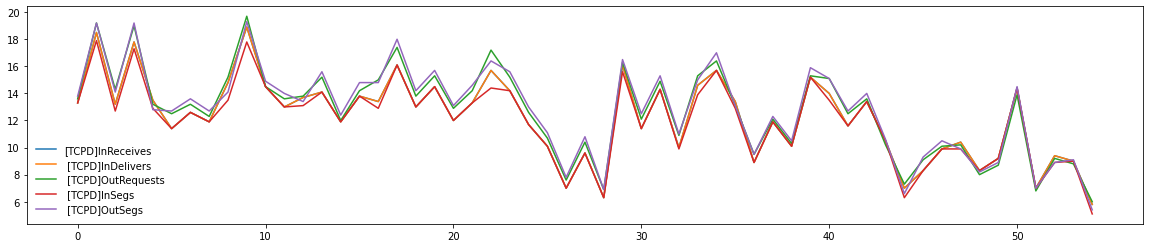

In [16]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
  if 'TCP' in col_name:
    if df[col_name].describe()[2] > 0:
      plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [17]:
rt_log_file_name  = 'metric_rt_threshold2000_3000.log'
cpu_log_file_name = 'metric_cpu_threshold40_70.log'

In [18]:
df_cpu = pd.read_csv(cpu_log_file_name, sep=',', header=0)

df_rt  = pd.read_csv(rt_log_file_name, sep=',', header=0)

In [19]:
print(df_cpu.count()[0])
print(df_rt.count()[0])

60
55


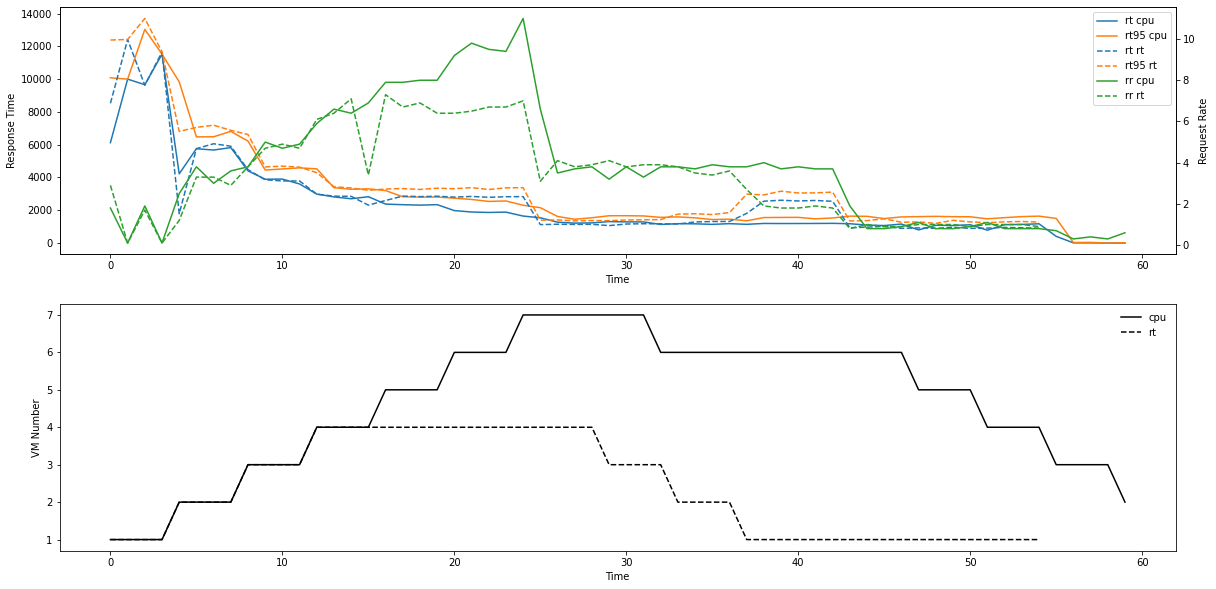

In [20]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns2 = ax1.plot(df_cpu[' response_time_p95'], color = 'C1', label = 'rt95 cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')
lns4 = ax1.plot(df_rt[' response_time_p95'], color = 'C1', linestyle = 'dashed', label = 'rt95 rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

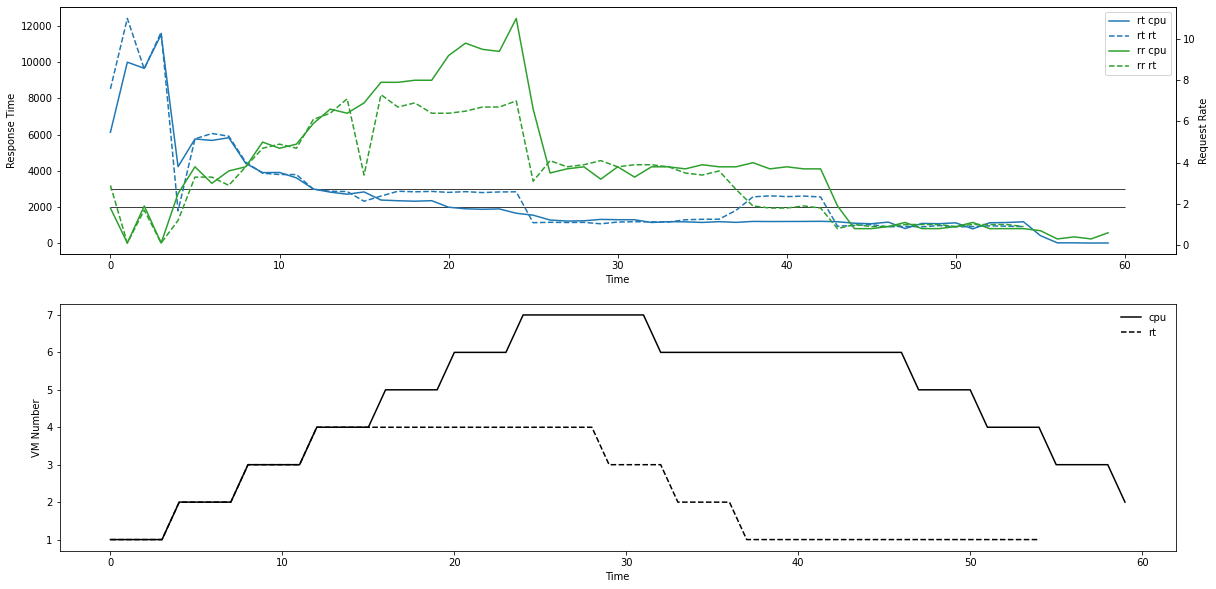

In [21]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 10))

lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

ax2 = ax1.twinx()

lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

# added these three lines
lns = lns1+lns3+lns5+lns6
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

length = df_cpu[' response_time'].count()

ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

plt.show()

In [22]:
# https://towardsdatascience.com/matplotlib-styles-for-scientific-plotting-d023f74515b4

# https://github.com/garrettj403/SciencePlots

# https://pypi.org/project/SciencePlots/

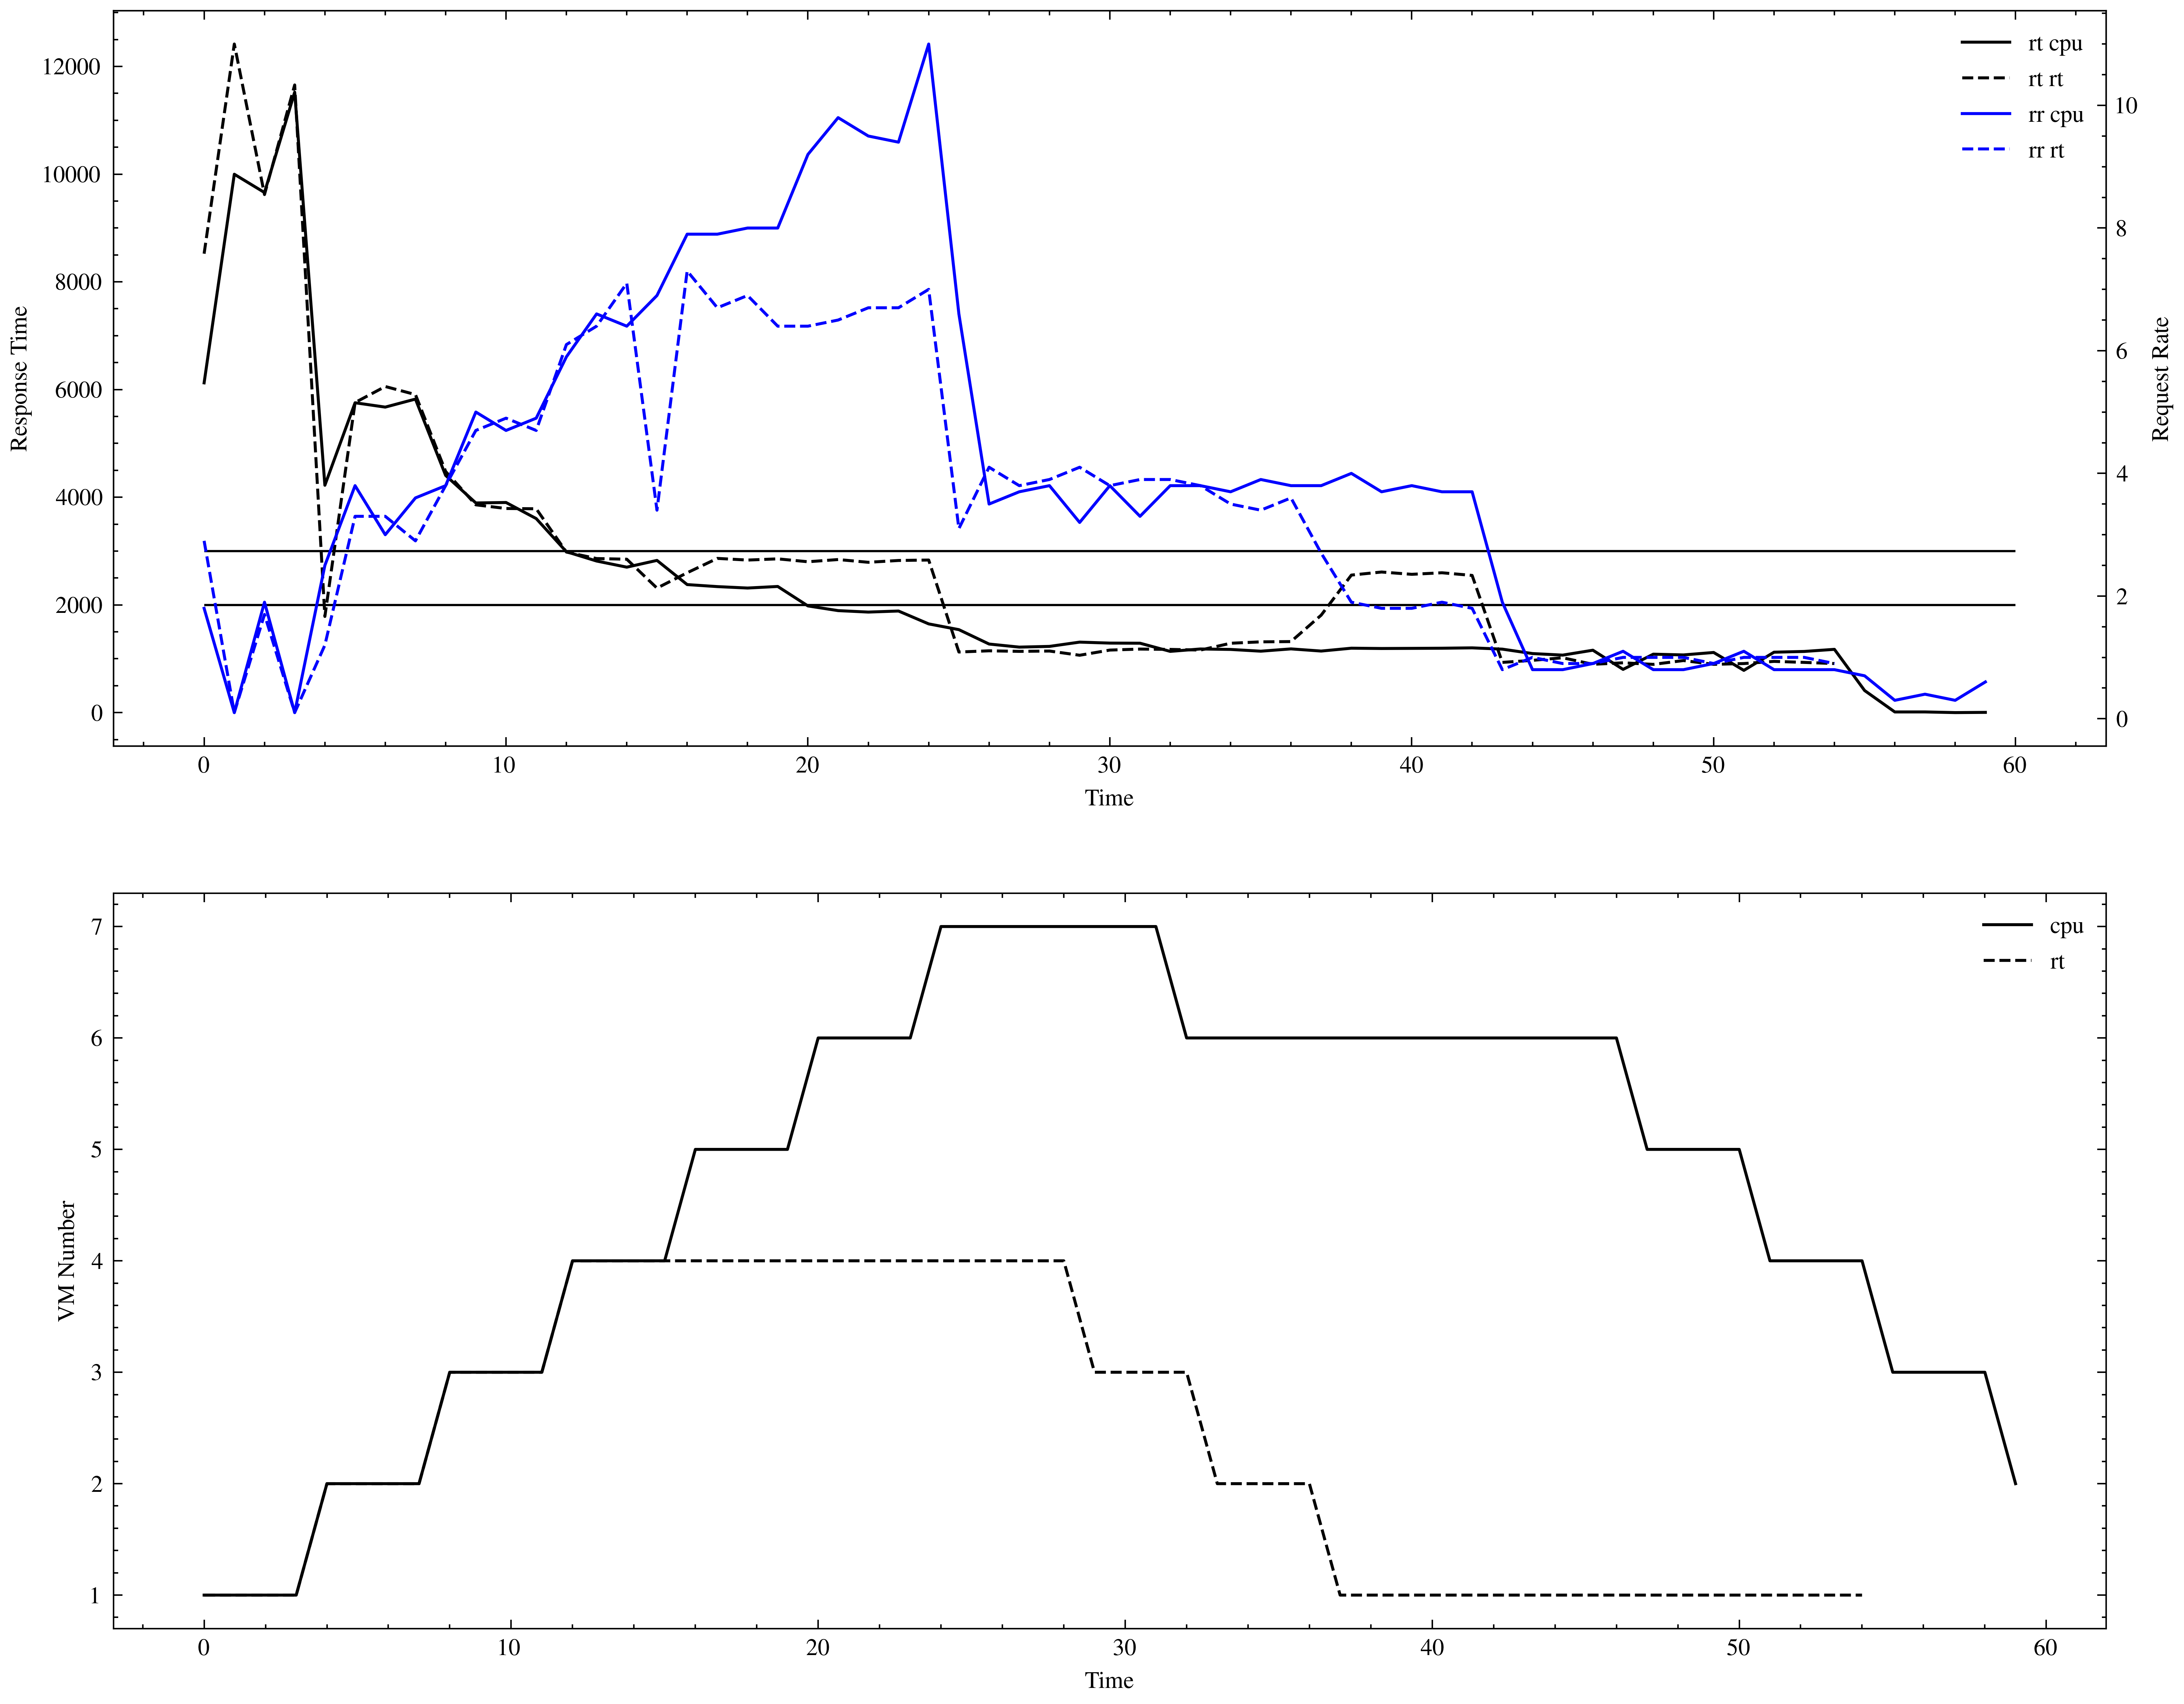

In [28]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()

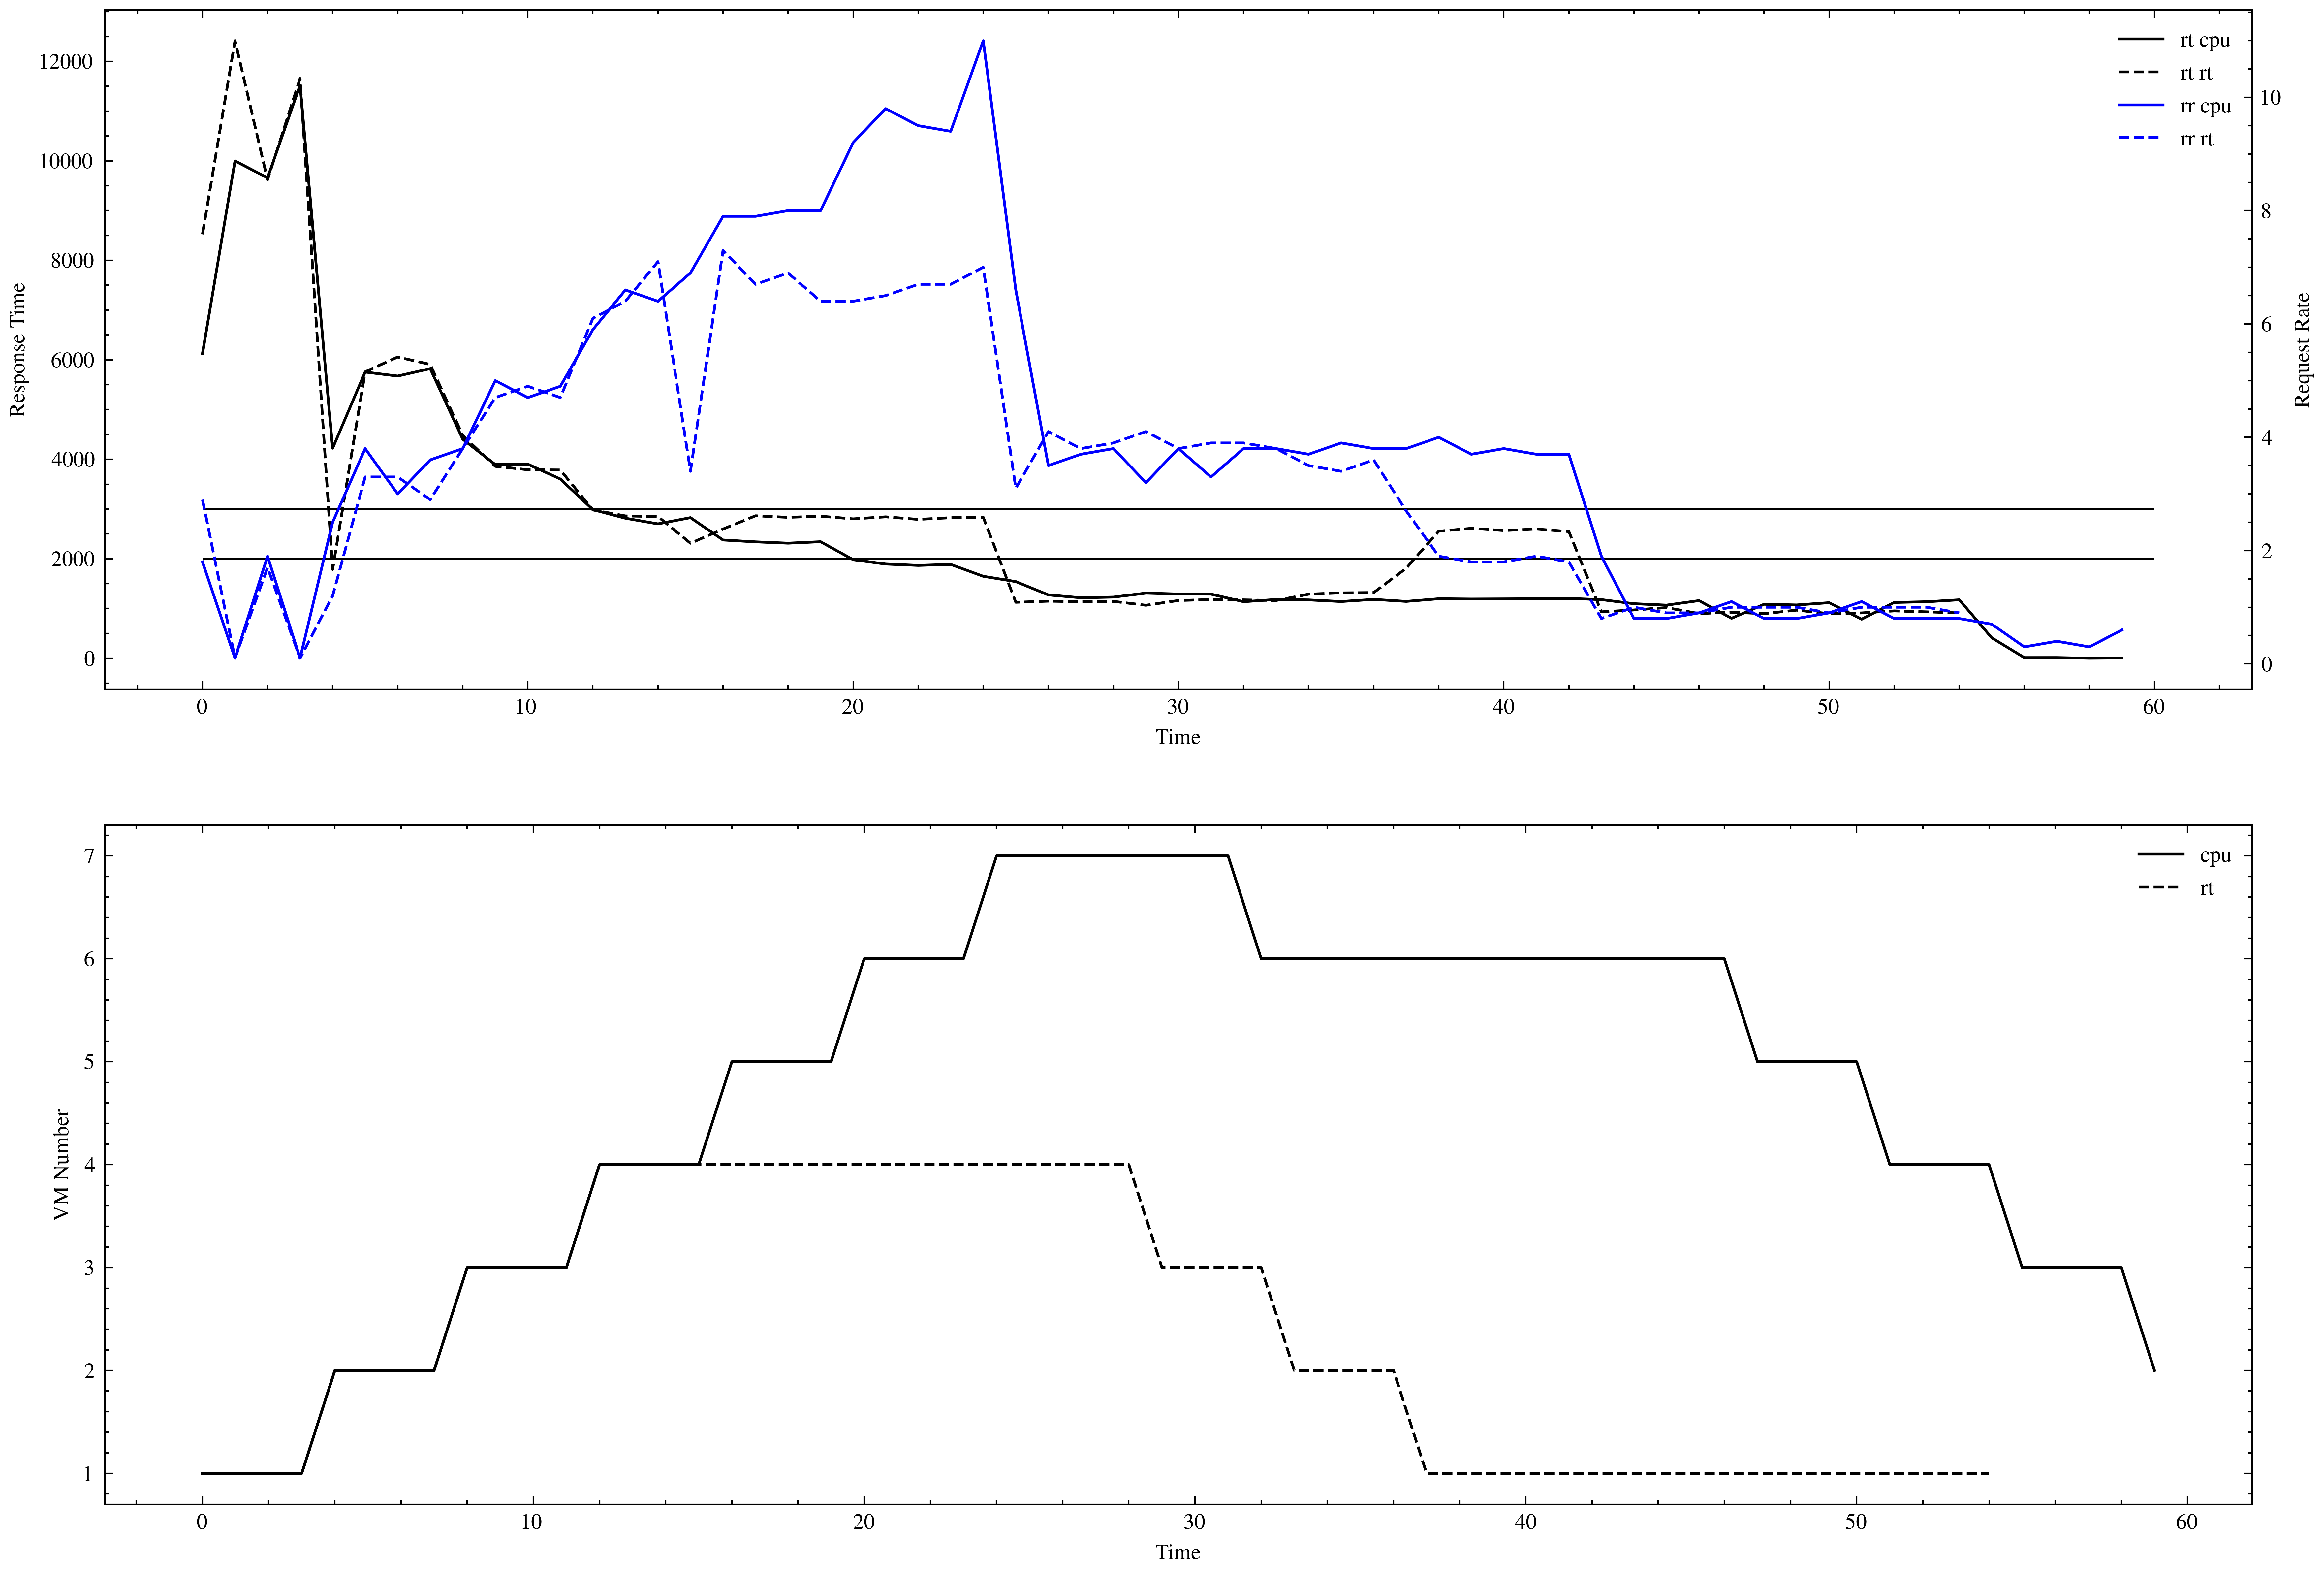

In [27]:
with plt.style.context(['science', 'ieee']):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10))

    lns1 = ax1.plot(df_cpu[' response_time'], color = 'C0', label = 'rt cpu')
    lns3 = ax1.plot(df_rt[' response_time'], color = 'C0', linestyle = 'dashed', label = 'rt rt')

    ax2 = ax1.twinx()

    lns5 = ax2.plot(df_cpu[' request_rate'], color = 'C2', label = 'rr cpu')
    lns6 = ax2.plot(df_rt[' request_rate'], color = 'C2', linestyle = 'dashed', label = 'rr rt')

    # added these three lines
    lns = lns1+lns3+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=0)

    length = df_cpu[' response_time'].count()

    ax1.hlines(3000, 0, length, linewidth=0.75, color = 'black')
    ax1.hlines(2000, 0, length, linewidth=0.75, color = 'black')

    ax1.set_xlabel('Time'); ax1.set_ylabel('Response Time'); ax2.set_ylabel('Request Rate');



    ax3.plot(df_cpu[' worker_number'], color = 'black', label = 'cpu')
    ax3.plot(df_rt[' worker_number'], color = 'black', linestyle = 'dashed', label = 'rt')

    ax3.set_xlabel('Time'); ax3.set_ylabel('VM Number'); ax3.legend(frameon=False)

    plt.show()